# Model `PRIMP`

In [1]:
# use project files rather than the installed PyBMF

%load_ext autoreload
%autoreload 2

import sys
sys.path.insert(0, '../')

[I] m            : 300
[I] n            : 500
[I] k            : 5
[I] overlap      : 2
[I] seed         : 1997
[I] noise        : 2
[I] seed         : 2000
[I] Using RandomState.


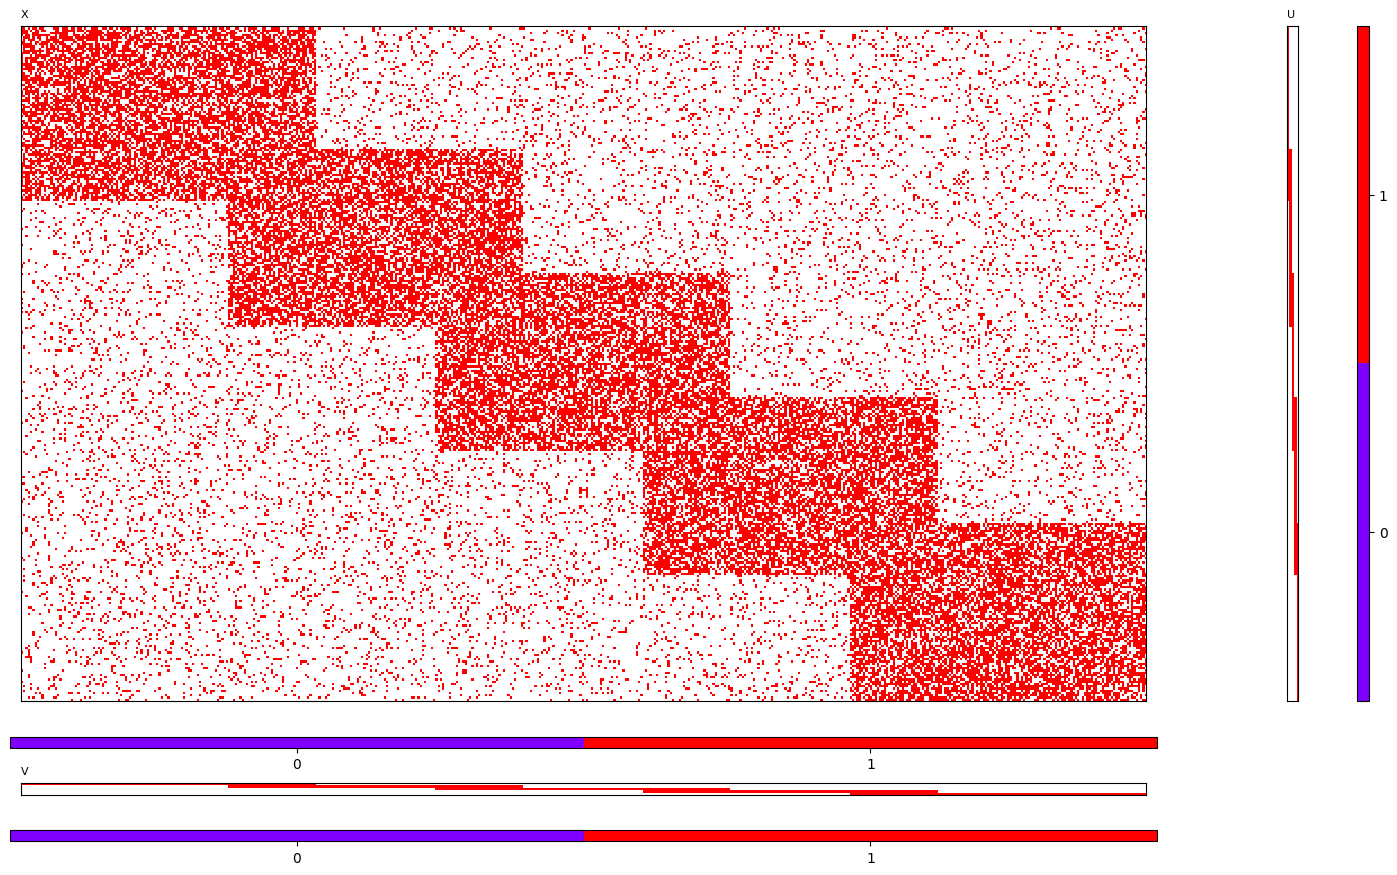

<Figure size 640x480 with 0 Axes>

In [2]:
from generators import BlockDiagonalMatrixGenerator

data = BlockDiagonalMatrixGenerator(m=300, n=500, k=5, overlap=[0.3, 0.3])
data.generate(seed=1997)

data.add_noise(noise=[0.4, 0.1], seed=2000)
data.show_matrix()

In [3]:
from datasets import RatioSplit, NoSplit

# split = RatioSplit(X=data.X, val_size=0.1, test_size=0.2, seed=1997)
# split.negative_sample(
#     train_size=split.pos_train_size, 
#     val_size=split.pos_val_size, 
#     test_size=split.pos_test_size, 
#     seed=2023, type='popularity')

split = NoSplit(X=data.X)

# split.negative_sample(size=split.pos_size, type="popularity", seed=2023)

X_train, X_val, X_test = split.X_train, split.X_val, split.X_test

[I] NoSplit, sampling positives
[I] RatioSplit, sampling positives
[I]   seed         : 1720455844
[I]   train_size   : 41003
[I]   val_size     : 0
[I]   test_size    : 0
[I]   seed         : 1720455844


[I] k            : 5
[I] reg          : 0.01
[I] reg_growth   : 1.02
[I] max_iter     : 1000
[I] min_diff     : 1e-08
[I] beta         : 0.0001
[I] seed         : 2023
[I] verbose      : False
[I] display      : False
[I] task         : reconstruction
[I] Missing validation data.
[W] Missing testing data.


[I] error: 20223.5254, U: [-0.0001, 1.0000], V: [-0.0002, 1.0000]:   6%|▌         | 60/1000 [00:00<00:03, 256.89it/s]


[W] Timer not started.
[I] model saved as: 24-07-09_04-10-56_PRIMP.pickle


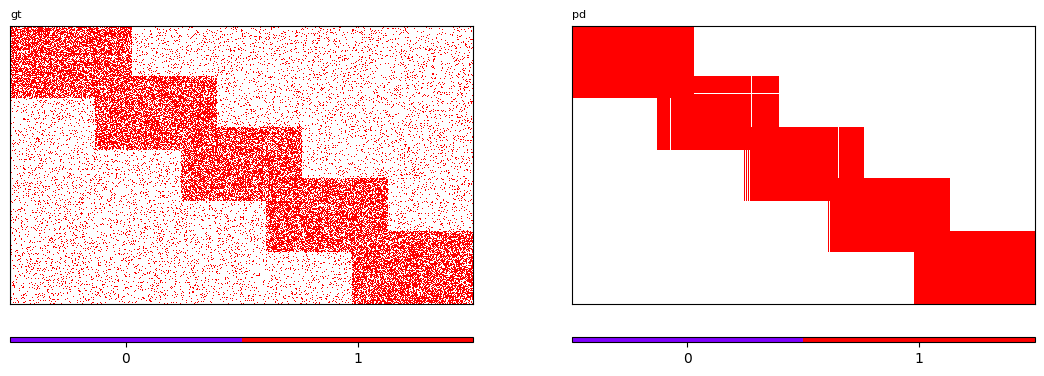

train                              
                             0                              
                time    Recall Precision  Accuracy        F1
0  09/07/24 04:10:56  0.740092  0.640873  0.815587  0.686919

<Figure size 640x480 with 0 Axes>

: 

In [13]:
from models import PRIMP

k = 5
reg = 0.01
reg_growth = 1.02
max_iter = 1000
min_diff = 1e-8
beta = 0.0001
seed = 2023
task = 'reconstruction'

model = PRIMP(k=k, reg=reg, reg_growth=reg_growth, max_iter=max_iter, min_diff=min_diff, beta=beta, seed=seed)
model.fit(X_train=X_train, task=task)

In [4]:
# import numpy as np
# import torch

# X = np.array(X_train.toarray(), dtype=np.float64)
# X = torch.from_numpy(X).float()

# U, V = PRIMP(
#     X                   = X,                  # a Boolean n*m matrix  
#     n_components        = 5,                 # number of components
#     l1reg               = 0.01,               # l1 coefficient
#     l2reg               = 0,               # l2 coefficient
#     regularization_rate = lambda t: 1.02**t,  # monotonically increasing regularization-rate function
#     maxiter             = 1000,               # maximum number of iterations
#     tolerance           = 1e-8,               # the threshold to the absolute difference between the current and previous losses determines the convergence
#     beta                = 0.0001,             # inertial coefficient of iPALM
#     callback            = None,               # e.g. lambda t, U, V, fn: print(t, fn)
#     with_rounding       = True)               # rounds U and V in case of early stopping



# from utils import show_matrix, matmul
# from scipy.sparse import csr_matrix

# U_sparse, V_sparse = csr_matrix(U), csr_matrix(V)
# X_sparse = matmul(U_sparse, V_sparse, boolean=True, sparse=True)
# X_original = csr_matrix(X)

# show_matrix([(U_sparse, [1, 0], 'U'), (V_sparse, [0, 1], 'V'), (X_sparse, [1, 1], 'X_pd'), (X_original, [1, 2], 'X_gt')])